**Run the two cells below before you begin. These will set the notebook to autosave every 10 seconds, import the necessary libraries for this challenge, and set figure appearance.**

In [1]:
%autosave 10

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl 

%matplotlib inline

mpl.rcParams['figure.dpi'] = 400
mpl.rcParams['font.size'] = 4

**To begin, import data set `cleaned_data.csv` and create lists of feature names for the remaining financial features: `'BILL_AMT1'`, `'BILL_AMT2'`, `'BILL_AMT3'`, `'BILL_AMT4'`, `'BILL_AMT5'`, `'BILL_AMT6'`,  `'PAY_AMT1'`, `'PAY_AMT2'`, `'PAY_AMT3'`, `'PAY_AMT4'`, `'PAY_AMT5'`, and `'PAY_AMT6'`.**

**Name the features `bill_feats` and `pay_amt_feats`, respectively.**

In [3]:
# Import the dataset
df=pd.read_csv("C:\Data-Science-Intern-2-Mini-Project-Task\Task-1\cleaned_data.csv")

In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [5]:
# Create lists `bill_feats` and `pay_amt_feats`
bill_feats=['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']
pay_amt_feats=['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']

____________________________________________________________________________________
**Next, use `.describe()` to examine statistical summaries of the bill amount features**


In [6]:
df[bill_feats]

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
0,3913,3102,689,0,0,0
1,2682,1725,2682,3272,3455,3261
2,29239,14027,13559,14331,14948,15549
3,46990,48233,49291,28314,28959,29547
4,8617,5670,35835,20940,19146,19131
...,...,...,...,...,...,...
26659,188948,192815,208365,88004,31237,15980
26660,1683,1828,3502,8979,5190,0
26661,3565,3356,2758,20878,20582,19357
26662,-1645,78379,76304,52774,11855,48944


In [7]:
df[pay_amt_feats]

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0,689,0,0,0,0
1,0,1000,1000,1000,0,2000
2,1518,1500,1000,1000,1000,5000
3,2000,2019,1200,1100,1069,1000
4,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...
26659,8500,20000,5003,3047,5000,1000
26660,1837,3526,8998,129,0,0
26661,0,0,22000,4200,2000,3100
26662,85900,3409,1178,1926,52964,1804


In [8]:
df[bill_feats].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,51405.730723,49300.001500,47026.340047,43338.894539,40338.136701,38889.872337
std,73633.687106,70934.549534,68705.359524,64275.250740,60705.944083,59432.541657
min,-165580.000000,-69777.000000,-157264.000000,-170000.000000,-81334.000000,-339603.000000
25%,3580.000000,2999.750000,2627.250000,2341.750000,1745.000000,1256.000000
50%,22361.000000,21150.000000,20079.500000,19037.000000,18066.000000,17005.000000
75%,67649.750000,64395.500000,60360.000000,54727.500000,50290.500000,49253.750000
max,746814.000000,671563.000000,855086.000000,706864.000000,823540.000000,699944.000000


Reflect on what you see. Does it make sense?

#### Observations :
   1. All the Bill Statement Amount columns have the same count showing that there are no missing data. 
   2. For all columns, **MEAN > MEDIAN**, which means that the features are positively skewed i.e. most values are clustered  
      around the left. 
   3. There is huge difference in minimum value and the first quartile (value of the 25th percentile).
   4. The 75th percentile value is closer to the maximum value of the data.
   5. Standard deviation is very high wich tells us that the values are spread out over a wide range. 

___________________________________________________________________________________
**Then you should visualize the bill amount features using a 2 by 3 grid of histogram plots.**
> Hint: You can use 20 bins for this visualization.

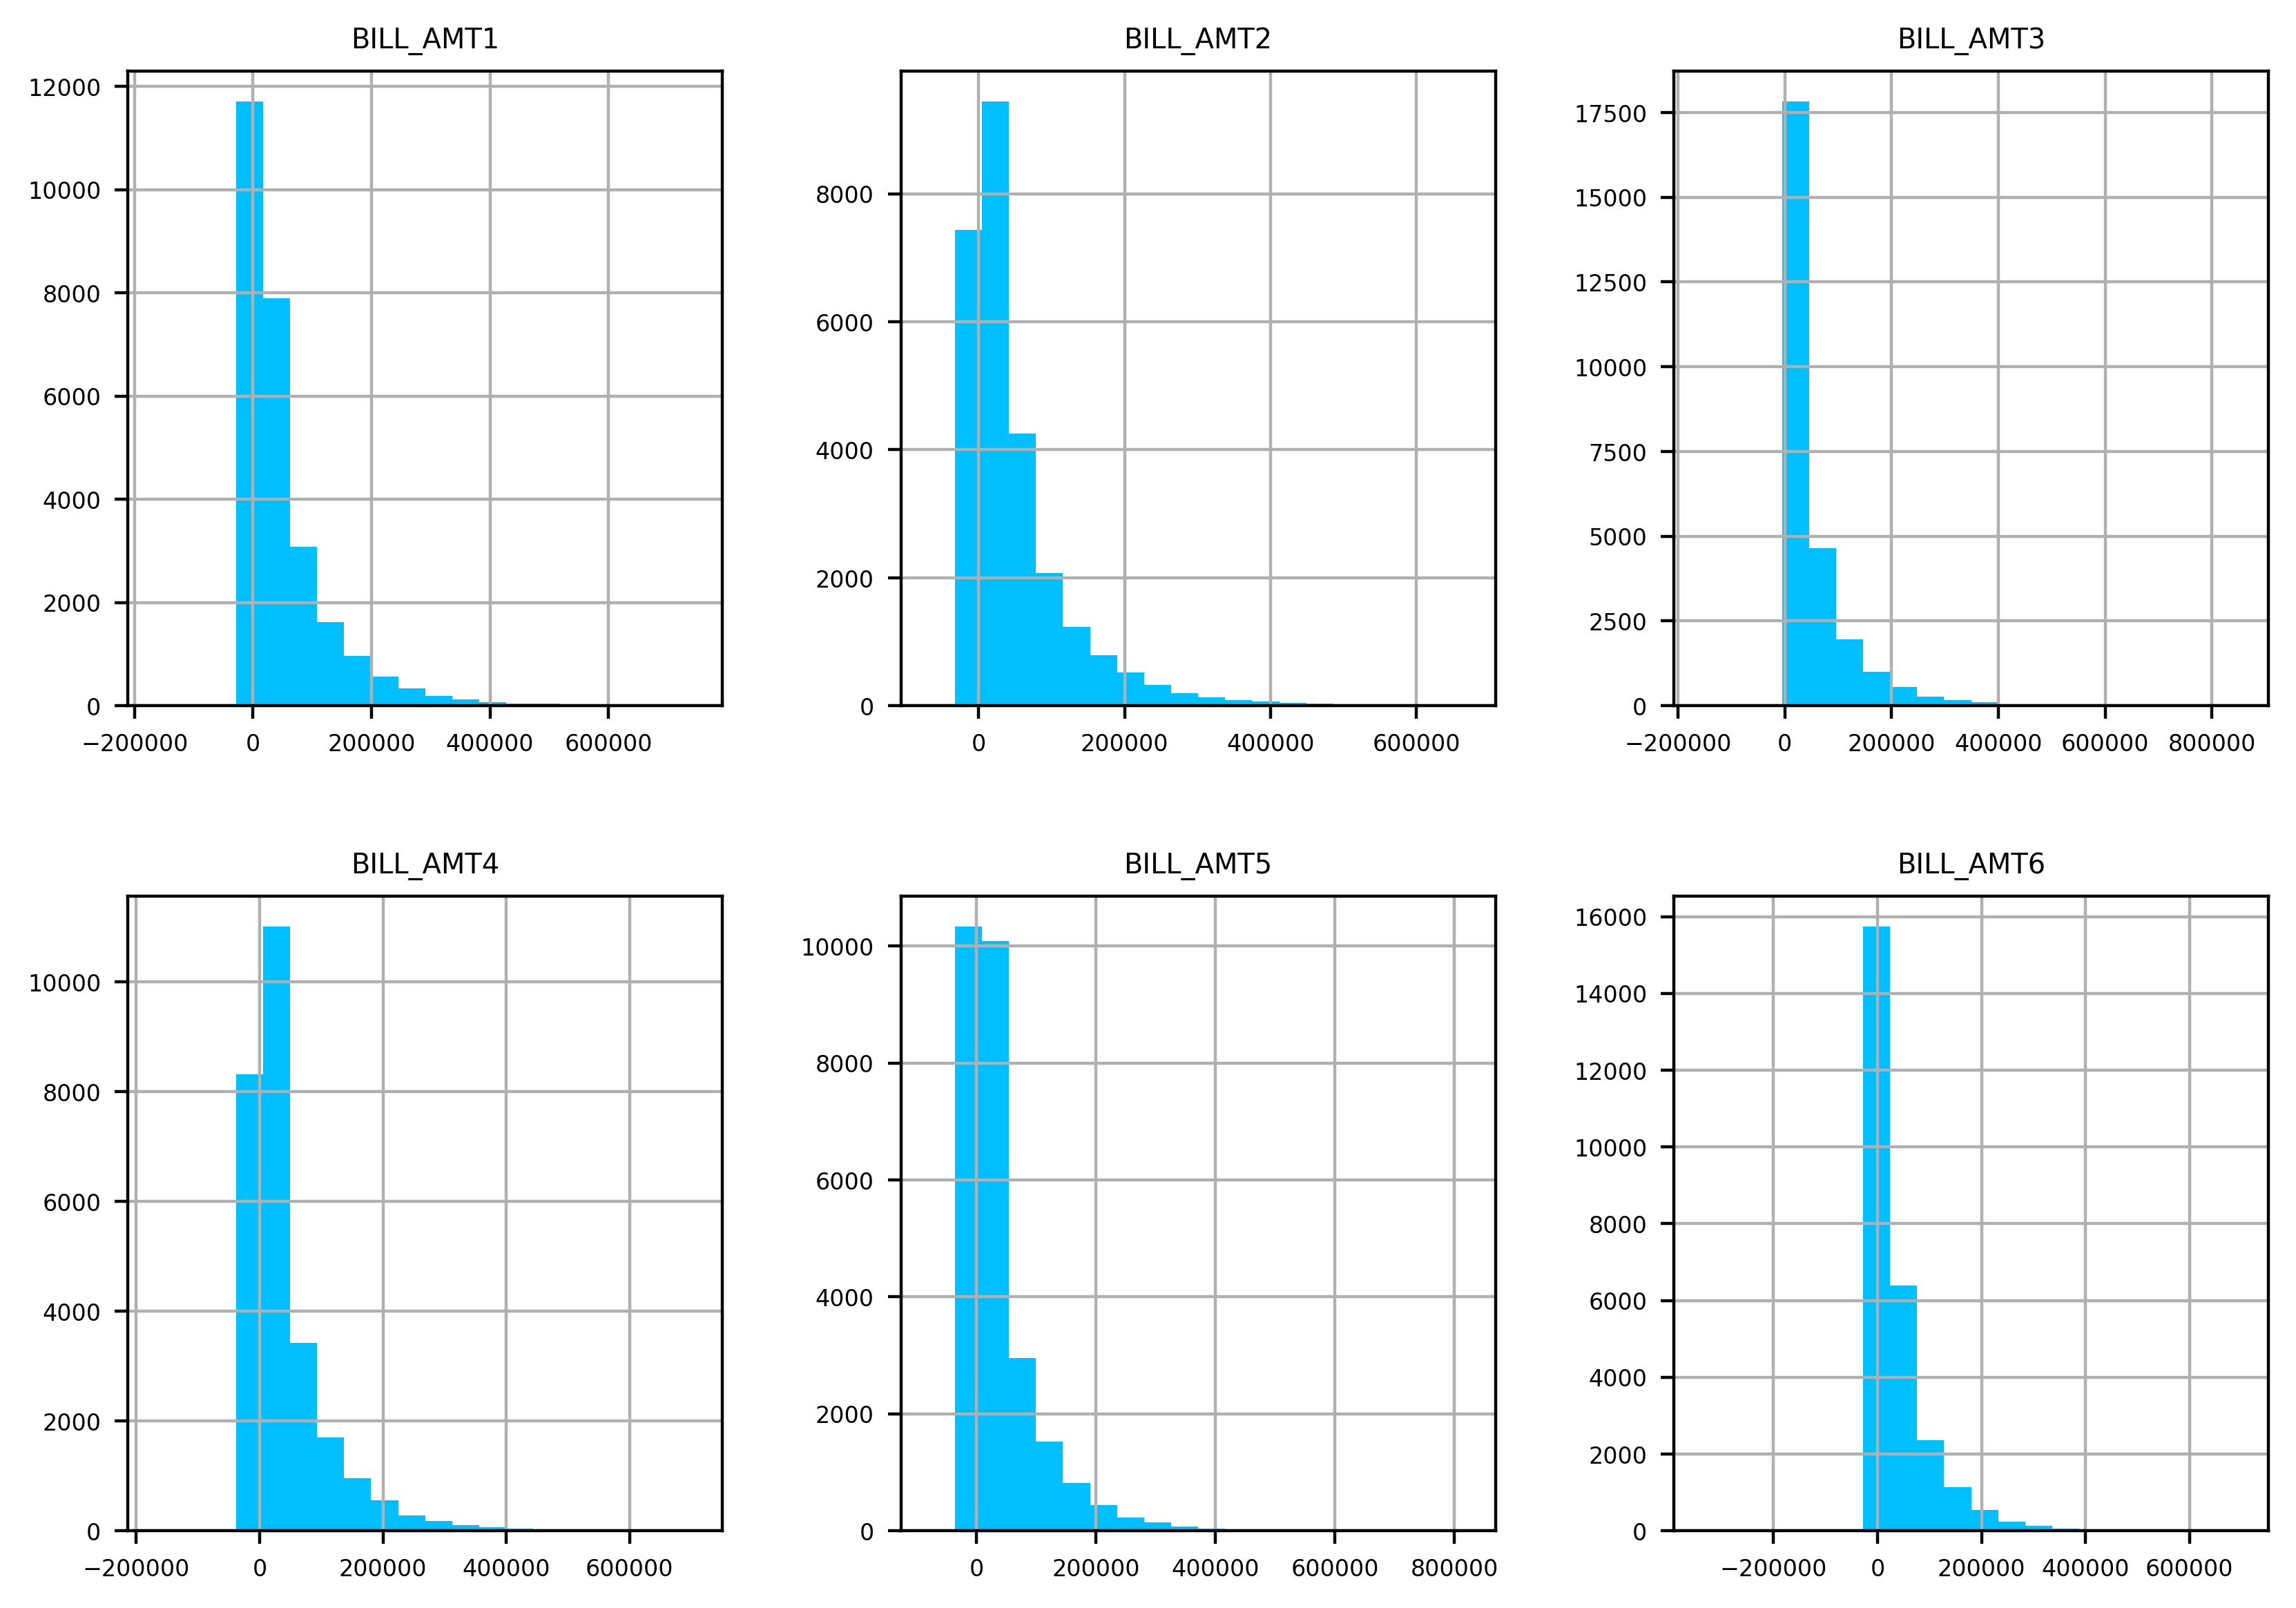

In [9]:
mpl.rcParams['font.size'] = 6
df[bill_feats].hist(bins=20, layout=(2,3),color='deepskyblue',figsize=(10,7));

________________________________________________________________________
**Next, obtain the `.describe()` summary of the payment amount features.**


In [10]:
df[pay_amt_feats].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,26664.000000,2.666400e+04,26664.000000,26664.000000,26664.000000,26664.000000
mean,5704.085771,5.881110e+03,5259.514964,4887.048717,4843.729973,5257.843047
std,16699.398632,2.121431e+04,17265.439561,15956.349371,15311.721795,17635.468185
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,8.020000e+02,390.000000,294.750000,242.750000,111.000000
50%,2114.500000,2.007000e+03,1822.000000,1500.000000,1500.000000,1500.000000
75%,5027.000000,5.000000e+03,4556.250000,4050.500000,4082.750000,4015.000000
max,873552.000000,1.227082e+06,889043.000000,621000.000000,426529.000000,528666.000000


    Does this make sense?

#### Observations :
   1. The Repayment Status columns have the same count as 26664 showing that there are no missing data. 
   2. For all columns, **MEAN > MEDIAN**, which means that the features are positively skewed i.e. most 
      values are clustered around the left. 
   3. The 75th percentile value is far from the maximum value of the data. If we consider the Statistical Description values  
      above and apply (1.5*Inter Quartile Range) Rule for Outliers, we interpret the presence of outliers in the data. 
      Presence of outliers effect the mean and standard deviation of the data.
   4. Standard deviation is very high wich tells us that the values are spread out over a wide range. 

_______________________________________________________________________________________
**Next, plot a histogram of the bill payment features similar to the bill amount features, 
but also apply some rotation to the x-axis labels with the `xrot` keyword argument 
so that they don't overlap. In any plotting function, you can include the `xrot=<angle>`
keyword argument to rotate x-axis labels by a given angle in degrees.**


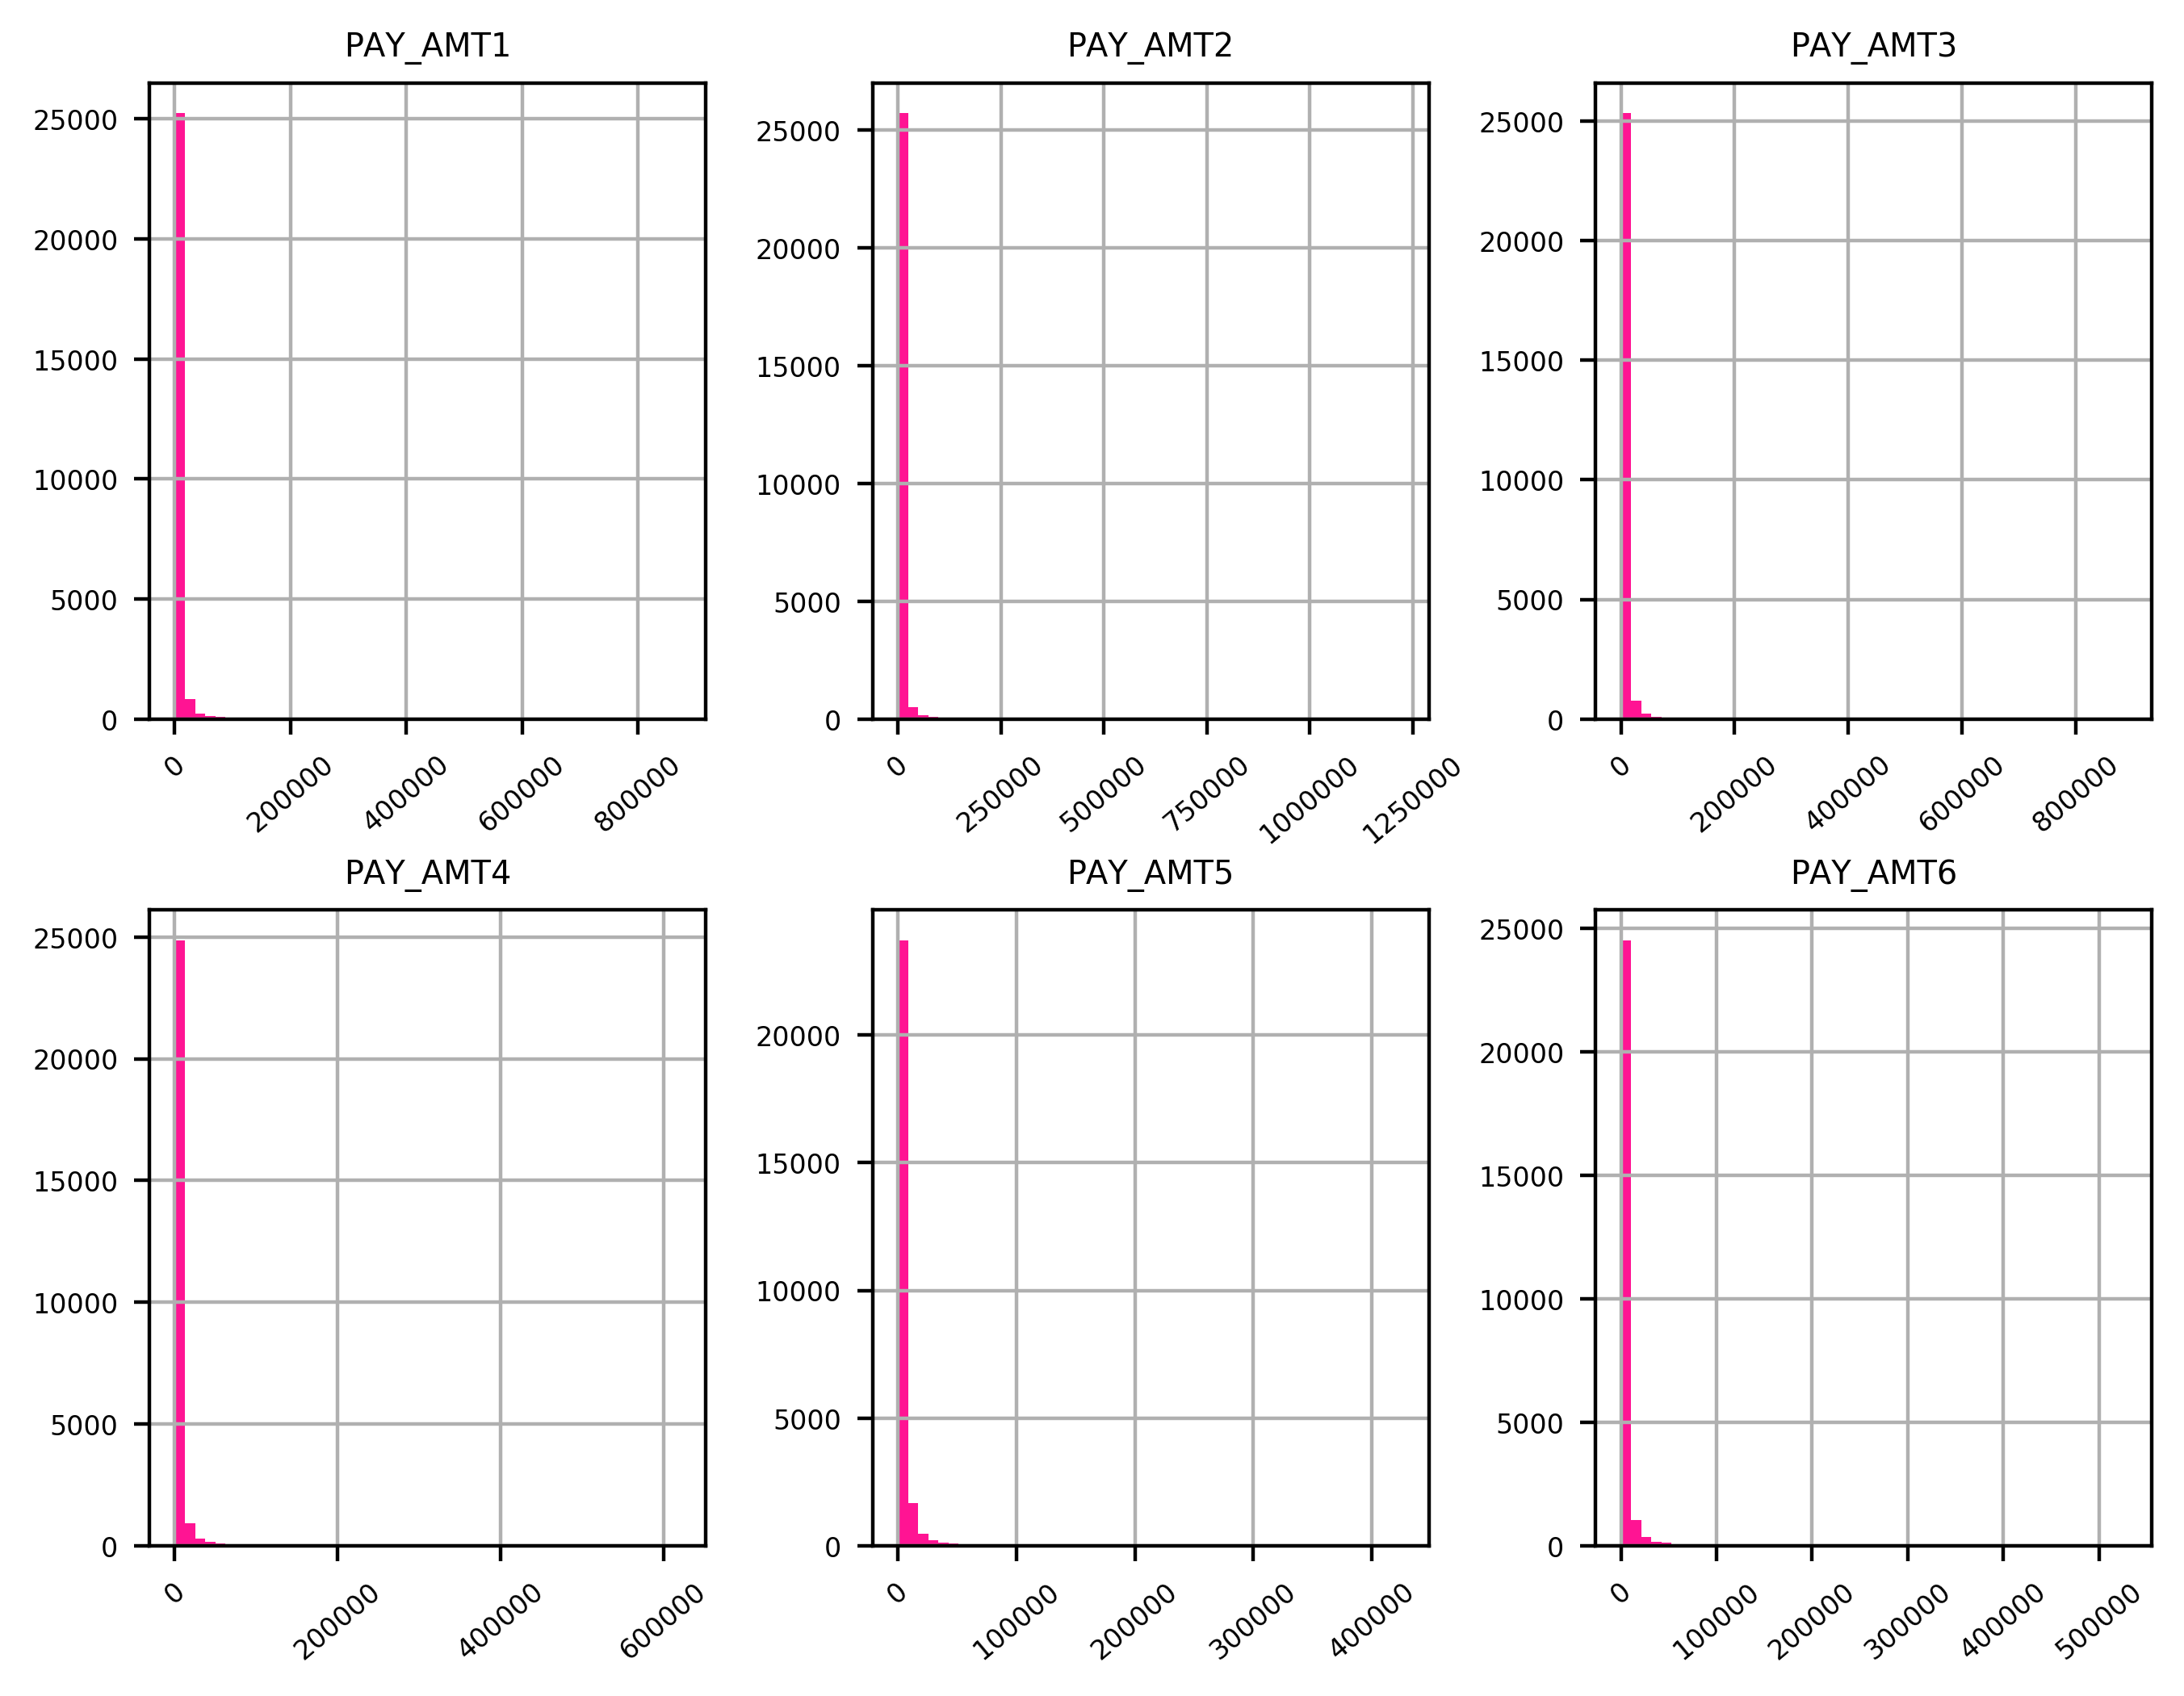

In [11]:
df[pay_amt_feats].hist(bins=50,layout=(2,3),color='deeppink',xrot=40,figsize=(8,6));

    Consider these results.

______________________________________________________________________________________________
**Then, use a Boolean mask to see how many of the payment amount data are exactly equal to 0. Review the results of the generated mask using `.head()` and `.sum()`.**



In [12]:
# Create Boolean mask
pay_0_mask=df[pay_amt_feats]==0

In [13]:
# Use `.head()`
pay_0_mask.head()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,True,False,True,True,True,True
1,True,False,False,False,True,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False


In [14]:
# Use `.sum()`
pay_0_mask.sum()

PAY_AMT1    4656
PAY_AMT2    4833
PAY_AMT3    5293
PAY_AMT4    5697
PAY_AMT5    5981
PAY_AMT6    6373
dtype: int64

     Does this make sense given the histogram in the previous step?

_______________________________________________________________________________________________________________________________
**Finally, ignoring the payments of 0 using the mask you created in the previous step, use pandas `.apply()` and NumPy's `np.log10()` to plot histograms of logarithmic transformations of the non-zero payments.**
> Hint: You can use `.apply()` to apply any function, including `log10`, to all the elements of a DataFrame or a column using the following syntax: `.apply(<function_name>)`.

In [15]:
~pay_0_mask       # Ignoring the payments of 0

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,False,True,False,False,False,False
1,False,True,True,True,False,True
2,True,True,True,True,True,True
3,True,True,True,True,True,True
4,True,True,True,True,True,True
...,...,...,...,...,...,...
26659,True,True,True,True,True,True
26660,True,True,True,True,False,False
26661,False,False,True,True,True,True
26662,True,True,True,True,True,True


In [16]:
df[pay_amt_feats][~pay_0_mask]

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,NaN,689.0,NaN,NaN,NaN,NaN
1,NaN,1000.0,1000.0,1000.0,NaN,2000.0
2,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...
26659,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
26660,1837.0,3526.0,8998.0,129.0,NaN,NaN
26661,NaN,NaN,22000.0,4200.0,2000.0,3100.0
26662,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


In [17]:
non0_log_pay=df[pay_amt_feats][~pay_0_mask].apply(np.log10)
non0_log_pay

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,NaN,2.838219,NaN,NaN,NaN,NaN
1,NaN,3.000000,3.000000,3.000000,NaN,3.301030
2,3.181272,3.176091,3.000000,3.000000,3.000000,3.698970
3,3.301030,3.305136,3.079181,3.041393,3.028978,3.000000
4,3.301030,4.564441,4.000000,3.954243,2.838219,2.831870
...,...,...,...,...,...,...
26659,3.929419,4.301030,3.699231,3.483872,3.698970,3.000000
26660,3.264109,3.547282,3.954146,2.110590,NaN,NaN
26661,NaN,NaN,4.342423,3.623249,3.301030,3.491362
26662,4.933993,3.532627,3.071145,3.284656,4.723981,3.256237


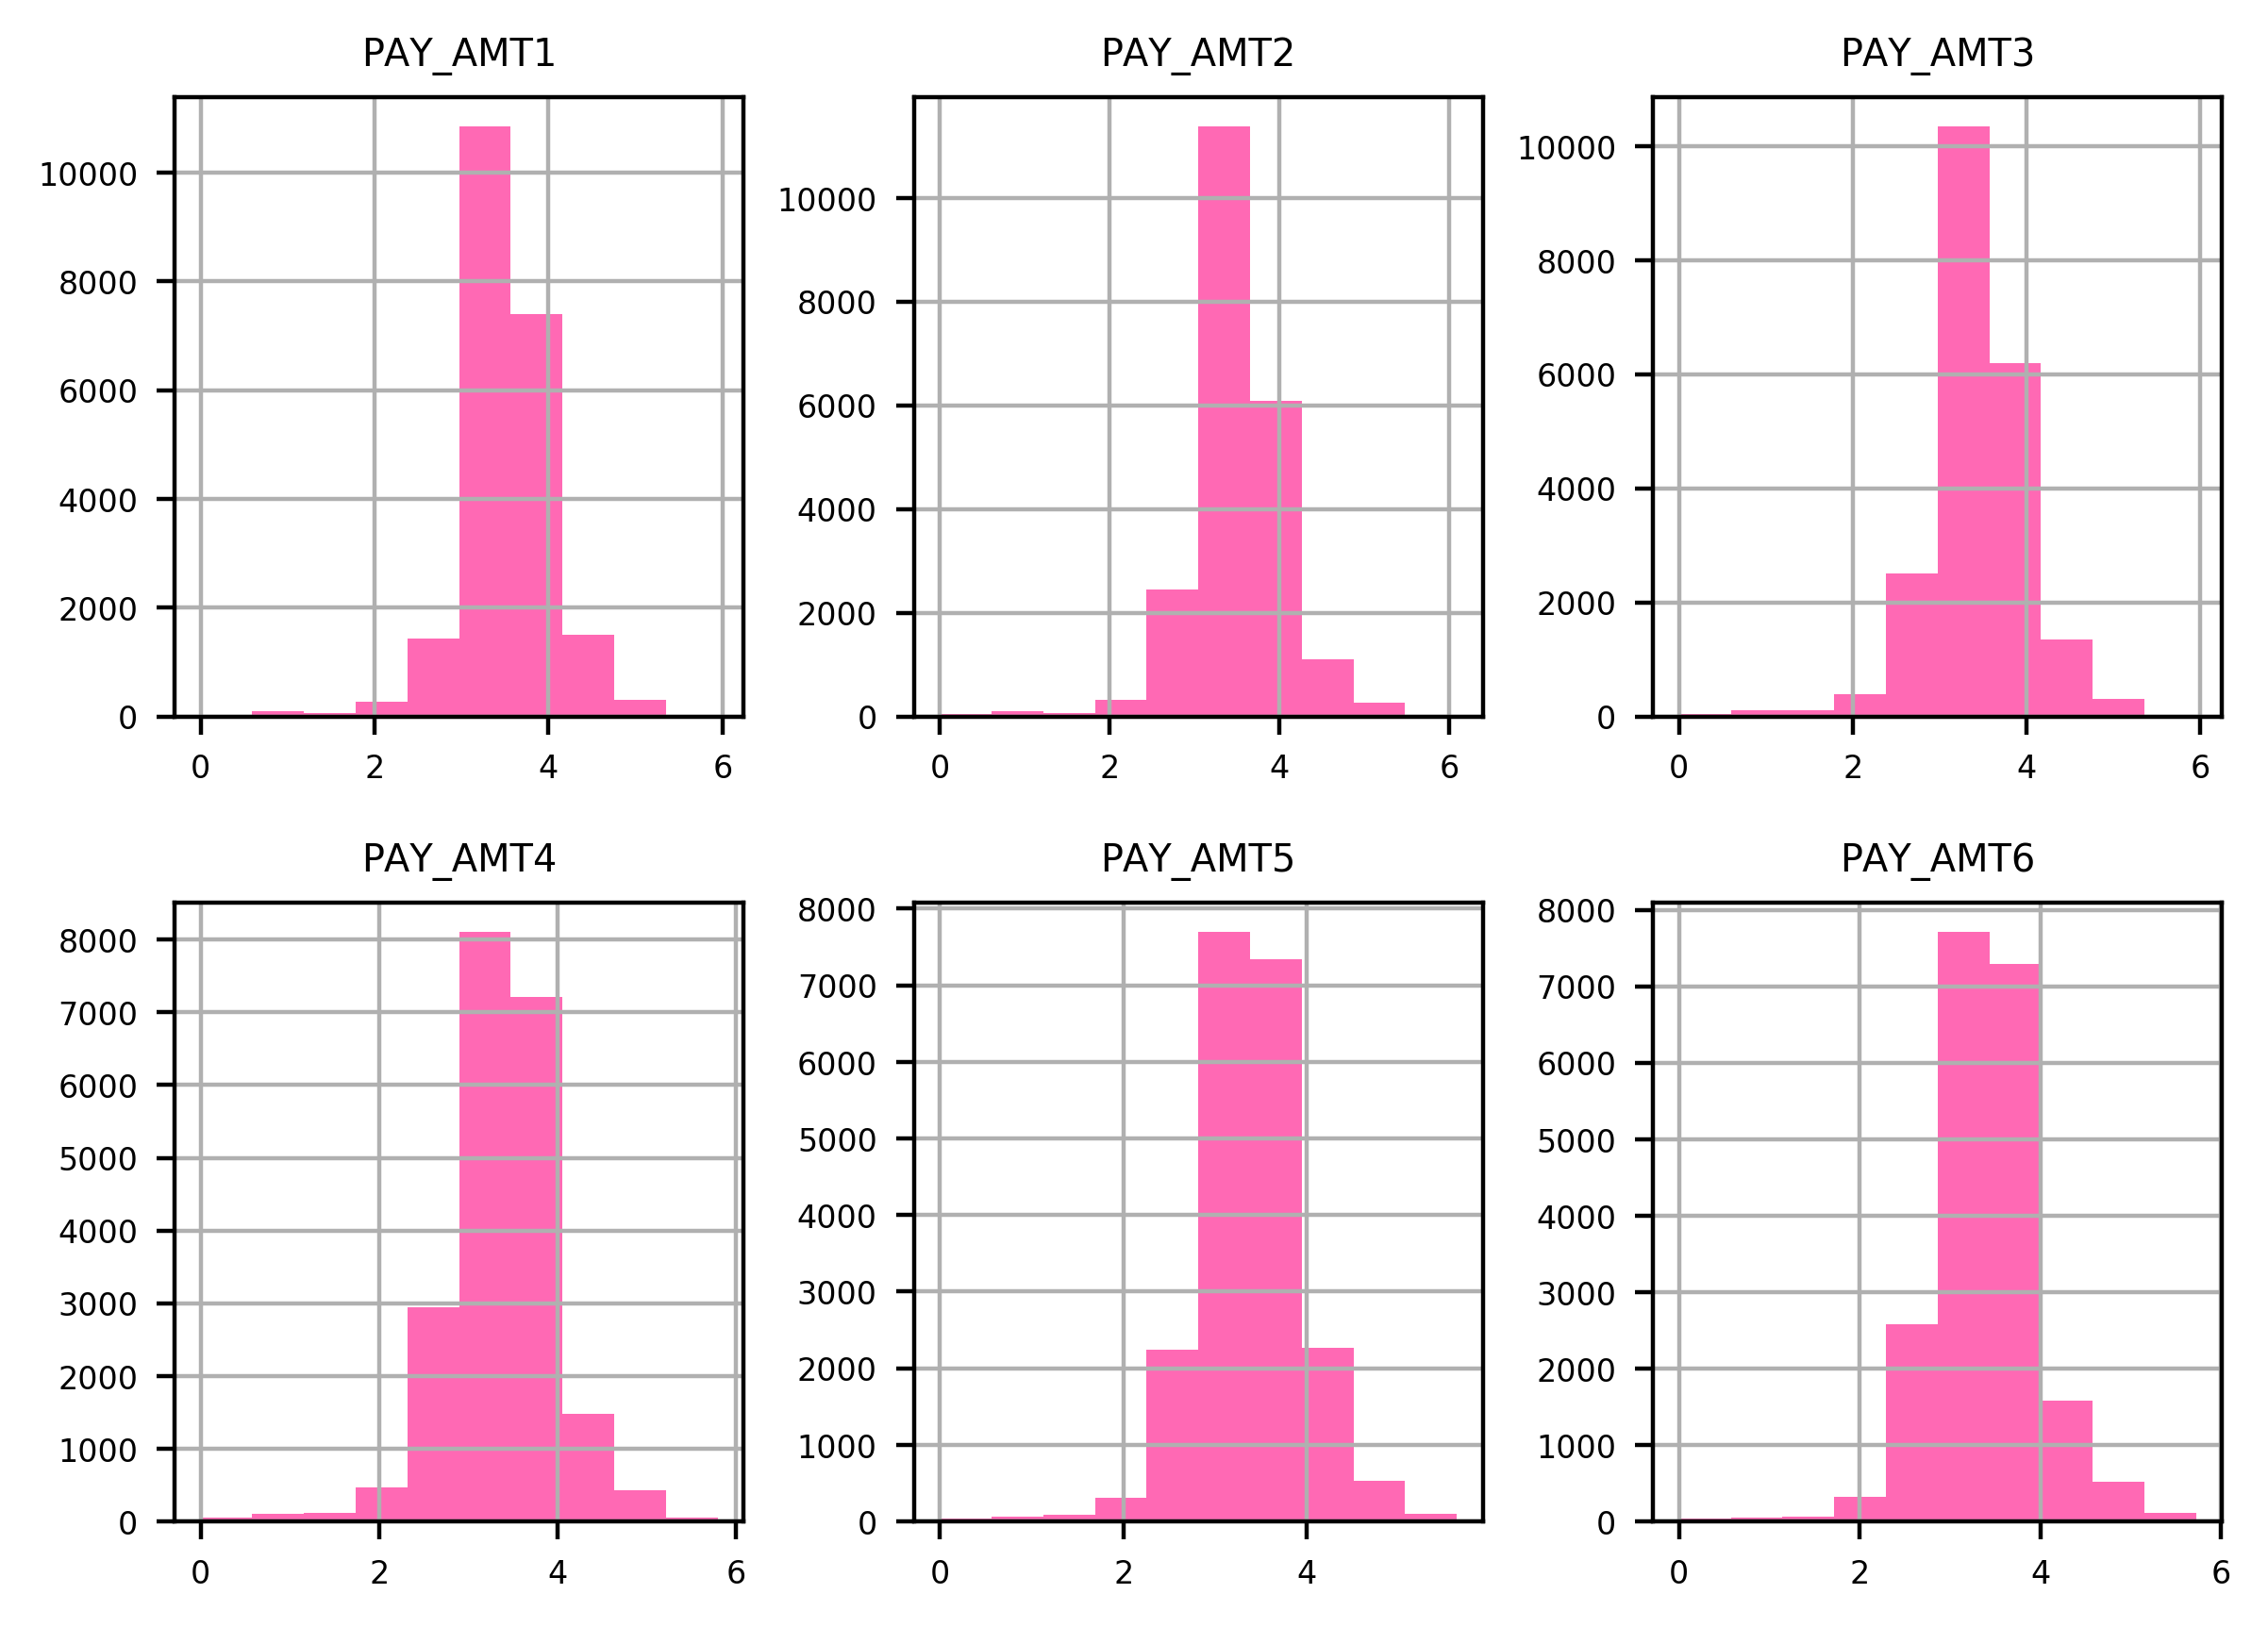

In [18]:
non0_log_pay.hist(layout=(2,3),color='hotpink',figsize=(7,5));

## From the above histograms, we can say that repayment status of all the months follows NORMAL DISTRIBUTION with the value lying between 3 and 4.